# Import Library

In [19]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

# Load Data

In [20]:
data = pd.read_csv("Crawling SNA.csv", sep=";")
data

,Username From,folcount,frcount,Tweet,Mention
0,wakilbupatipml,287,229,b'Vaksin tahap pertama sebelumnya sudah dilaku...,PemkabPemalang
1,wakilbupatipml,287,229,"b'Bupati Pemalang,\xc2\xa0 @muktiagungwbw, har...",muktiagungwbw
2,wakilbupatipml,287,229,"b'Bupati Pemalang,\xc2\xa0 @muktiagungwbw, har...",ganjarpranowo
3,papipungky,412,285,"b'Numpang tanya, kalau cekdi https://t.co/MwhV...",pedulilindungi
4,feelgoodboy,180,63,b'Kangkah itu adalah susulan daripada pendafta...,Khairykj
...,...,...,...,...,...
3174,slankdotcom,2689170,45,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,slankdotcom
3175,Metro_TV,10692937,86,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,medcom_id
3176,Metro_TV,10692937,86,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,slankdotcom
3177,medcom_id,30961,47,b'Mau tanya-tanya ke Slank @slankdotcom?\nSamp...,slankdotcom


# Pre Processing

### cek missing value

In [21]:
data.isna().sum()

Username From    0
folcount         0
frcount          0
Tweet            0
Mention          0
dtype: int64

### cek duplicated

In [22]:
duplicate = data[data.duplicated()]
duplicate.shape

(251, 5)

In [23]:
data = data.drop_duplicates(keep='first')
data.shape
data

,Username From,folcount,frcount,Tweet,Mention
0,wakilbupatipml,287,229,b'Vaksin tahap pertama sebelumnya sudah dilaku...,PemkabPemalang
1,wakilbupatipml,287,229,"b'Bupati Pemalang,\xc2\xa0 @muktiagungwbw, har...",muktiagungwbw
2,wakilbupatipml,287,229,"b'Bupati Pemalang,\xc2\xa0 @muktiagungwbw, har...",ganjarpranowo
3,papipungky,412,285,"b'Numpang tanya, kalau cekdi https://t.co/MwhV...",pedulilindungi
4,feelgoodboy,180,63,b'Kangkah itu adalah susulan daripada pendafta...,Khairykj
...,...,...,...,...,...
3173,slankdotcom,2689170,45,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,medcom_id
3174,slankdotcom,2689170,45,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,slankdotcom
3175,Metro_TV,10692937,86,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,medcom_id
3176,Metro_TV,10692937,86,b'RT @medcom_id: Mau tanya-tanya ke Slank @sla...,slankdotcom


# Social Network Analyst

### Membangun jaringan menggunakan NetworkX

In [18]:
covid_graph = nx.from_pandas_edgelist(data,source ="Username From",target="Mention")
covid_graph

### Menentukan nilai degree di setiap node

In [7]:
degree = nx.degree(covid_graph)
degree_df = pd.DataFrame(degree, columns=['node', 'degree']).sort_values(by='degree',ascending=False)

In [8]:
degree_df.head(10)

,node,degree
10,KemenkesRI,158
554,sikecilmarmut,125
283,Vaksin_Kita,66
281,ontynad,65
280,Vaksin_Update,65
282,VaksinBersama,62
439,slankdotcom,62
278,GekmaRenata,61
279,berjoang,39
353,AwalanR_,26


### Hasil Visualisasi

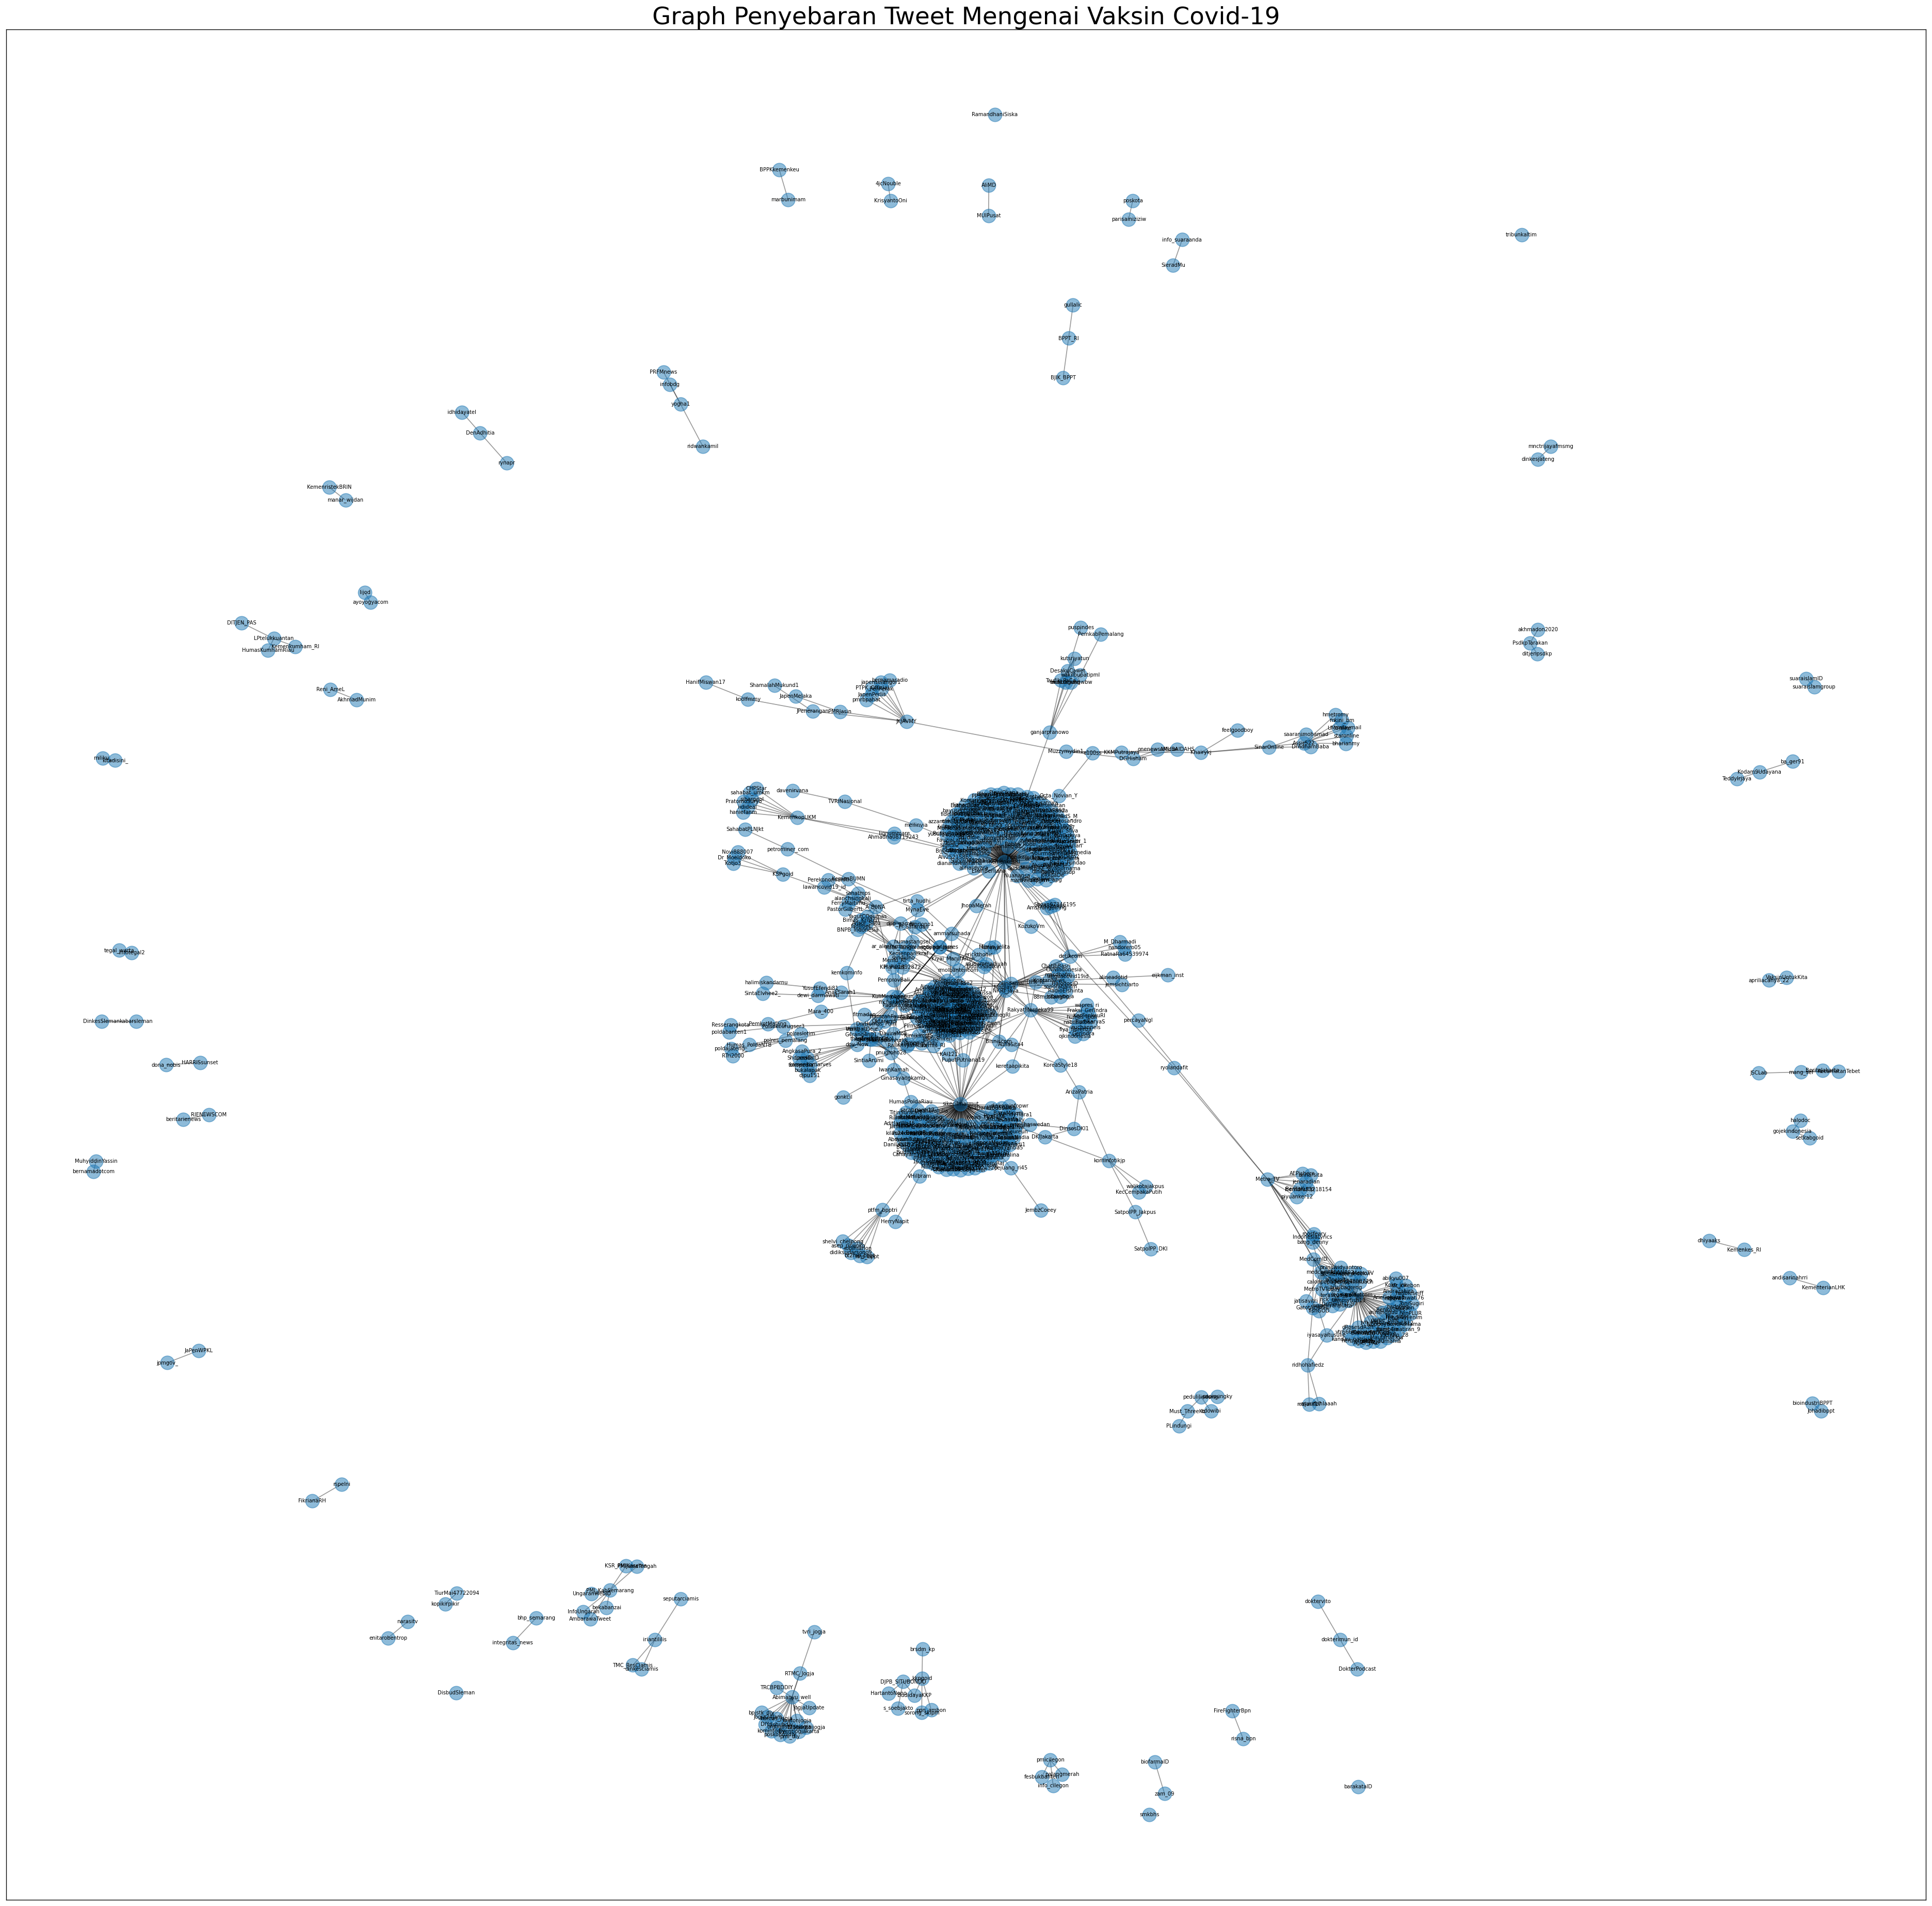

In [19]:
pos = nx.spring_layout(covid_graph)
f, ax = plt.subplots(dpi=120, figsize=(40, 40))
nodes = nx.draw_networkx_nodes(covid_graph, pos, alpha=0.5, node_size=250)
plt.title('Graph Penyebaran Tweet Mengenai Vaksin Covid-19',fontsize=28)
nx.draw_networkx_labels(covid_graph, pos, font_size=6)
nx.draw_networkx_edges(covid_graph, pos, width=1.0, alpha=0.4)
plt.show()

# Hasil Analisis

Dari distribusi data menyatakan bahwa terdapat 733 node yang terbentuk, dimana node yang ditentukan untuk awal proses pengerjaan adalah atribut "username from".
Dan dijelaskan bahwa koneksi maximum yang terjadi adalah sebanyak 158 dengan rata rata koneksi 3.28. Sebanyak 75% node hanya memiliki 2 koneksi, sedangkan 50% hanya memiliki koneksi sebanyak 1.

In [10]:
degree_df.describe()

,degree
count,733.000000
mean,3.282401
std,9.734771
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,158.000000


Pada penjelasan berikutnya terdapat 50 sub grafik yang terputus sehingga tidak dapat terhubung dan terbentuk secara sempurna.

In [11]:
nx.number_connected_components(covid_graph.to_undirected())

50